### Install konlpy

In [1]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [457 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/multiverse amd64 Packages [49.9 kB]
Get:13 http://archive.ubunt

E: Package 'python-dev' has no installation candidate


In [2]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [3]:
pip install python-mecab-ko

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 573.9/573.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 24.6 MB/s eta 0:00:00


In [4]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2023-08-09 17:07:37--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2023-08-09 17:07:37--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc38d85d382d6199a781007988b7.dl.dropboxusercontent.com/cd/0/get/CBcTcfi4ezivjTHJmtLuGtxldkTAhH8AmFnf_SEnEwqG4nYVYrjbReKN4gpzmJ7-oI8-xT1X7iejbtid2N-NMWWXL9sK_2S3G_LohByK0ZLR361iZsEhlgNHej5C5x43StcbcCes0FsnFSTLseomTJ-G/file?dl=1# [following]
--2023-08-09 17:07:37--  https://uc38d85d382d6199a781007988b7.dl.dropboxusercontent.com/cd/0/get/CBcTcfi4ezivjTHJmtLuGtxldkTAhH8AmFnf_SEnEwqG4nYVYrjbReK

**test example**

In [5]:
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from mecab import MeCab

In [6]:
mecab = MeCab()
sentence = "안녕하세요 저는 사과입니다."
temp_X = mecab.morphs(sentence)
temp_X

['안녕', '하', '세요', '저', '는', '사과', '입니다', '.']

### 경제일간지, kospi 데이터 합치기

In [7]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/FIELD_2023/초등학교_기사검색_데이터.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [9]:
df = df[['일자', '제목']]
df

,일자,제목
0,20230810,"수업중 교사에 총 쏜 6살 소년, 범행 직후 내뱉은 말에 美경악"
1,20230810,[사설] 경기 두 초등교사 죽음의 진실 진작 가려졌다면
2,20230810,내년 울산지역 공립교사 179명 선발 예정
3,20230810,내년 도내 초등교원 선발 75명 ' 역대 최소' 교육계 술렁
4,20230810,[광화문에서/김현지]사교육에 자리 내준 공교육 교사 학교 권위 실추 불렀다
...,...,...
15883,20220810,"""책으로 세상을 읽는다""-아산교육지원청,"
15884,20220810,[인터뷰 공감] '시민행복 중심' 이행숙 인천시 첫 여성 문화복지정무부시장
15885,20220810,내년 ‘초등 전일제’ 도입 만5세 입학 사실상 폐기
15886,20220810,‘만 5세 입학’ 사실상 폐기 “현실적으로 어렵다”


In [10]:
print(df.isnull().values.any())

False


In [11]:
df_copy = df

### 텍스트 전처리

In [12]:
import re
from konlpy.tag import Okt
import numpy as np

okt = Okt()
backupdf = df.copy()
def make_dataframe_with_nouns_and_delete_columns(df):
  n_ = []
  title_rename = []
  for i in range(len(df)):
    if (i%10000 == 0):
      print(i, "단계 완료")
    title_rename.append(re.sub("[\(\[].*?]\)\]]", "", df.iloc[i]["제목"]))
    n_.append(' '.join(okt.nouns(df.iloc[i]["제목"])))
  df["nouns"] = n_
  df["제목"] = title_rename
  df = df[df['nouns'] != '']

  df["제목"] = df["제목"].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")
  df["제목"].replace('', np.nan, inplace=True)
  df = df.dropna(how='any')
  return df

backupdf = make_dataframe_with_nouns_and_delete_columns(backupdf)

0 단계 완료
10000 단계 완료


<ipython-input-12-68862985c5ff>:19: FutureWarning: The default value of regex will change from True to False in a future version.
  df["제목"] = df["제목"].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")
<ipython-input-12-68862985c5ff>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["제목"] = df["제목"].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")
<ipython-input-12-68862985c5ff>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["제목"].replace('', np.nan, inplace=True)


In [13]:
df = backupdf.copy()
print(df.shape)
df.head(1)

(15887, 3)


,일자,제목,nouns
0,20230810,수업중 교사에 총 쏜 살 소년 범행 직후 내뱉은 말에 경악,수업 교사 총 살 소년 범행 직후 말 경악


In [14]:
df['list'] = df['nouns'].str.split(" ")

In [15]:
df = df.reset_index(drop=True)
df

,일자,제목,nouns,list
0,20230810,수업중 교사에 총 쏜 살 소년 범행 직후 내뱉은 말에 경악,수업 교사 총 살 소년 범행 직후 말 경악,"[수업, 교사, 총, 살, 소년, 범행, 직후, 말, 경악]"
1,20230810,사설 경기 두 초등교사 죽음의 진실 진작 가려졌다면,사설 경기 두 초등 교사 죽음 진실 진작,"[사설, 경기, 두, 초등, 교사, 죽음, 진실, 진작]"
2,20230810,내년 울산지역 공립교사 명 선발 예정,내년 울산 지역 공립 교사 명 선발 예정,"[내년, 울산, 지역, 공립, 교사, 명, 선발, 예정]"
3,20230810,내년 도내 초등교원 선발 명 역대 최소 교육계 술렁,내년 도내 초 등교 선발 명 역대 최소 교육 술렁,"[내년, 도내, 초, 등교, 선발, 명, 역대, 최소, 교육, 술렁]"
4,20230810,광화문에서김현지사교육에 자리 내준 공교육 교사 학교 권위 실추 불렀다,광화문 김현지 사교육 자리 공교육 교사 학교 권위 실추,"[광화문, 김현지, 사교육, 자리, 공교육, 교사, 학교, 권위, 실추]"
...,...,...,...,...
15882,20220810,책으로 세상을 읽는다아산교육지원청,책 세상 아산 교육지원청,"[책, 세상, 아산, 교육지원청]"
15883,20220810,인터뷰 공감 시민행복 중심 이행숙 인천시 첫 여성 문화복지정무부시장,인터뷰 공감 시민 행복 중심 이행 숙 인천 시 첫 여성 문화 복지 정무 부시장,"[인터뷰, 공감, 시민, 행복, 중심, 이행, 숙, 인천, 시, 첫, 여성, 문화,..."
15884,20220810,내년 초등 전일제 도입 만세 입학 사실상 폐기,내년 초등 일제 도입 만 세 입학 사실 폐기,"[내년, 초등, 일제, 도입, 만, 세, 입학, 사실, 폐기]"
15885,20220810,만 세 입학 사실상 폐기 현실적으로 어렵다,만 세 입학 사실 폐기 현실,"[만, 세, 입학, 사실, 폐기, 현실]"


### WordCloud 생성

In [16]:
a = df['list'].values.tolist()
b = sum(a , [])

In [17]:
word = [i for i in b if len(i) > 1]

In [18]:
from collections import Counter

counts = Counter(word)
tags = counts.most_common(100)

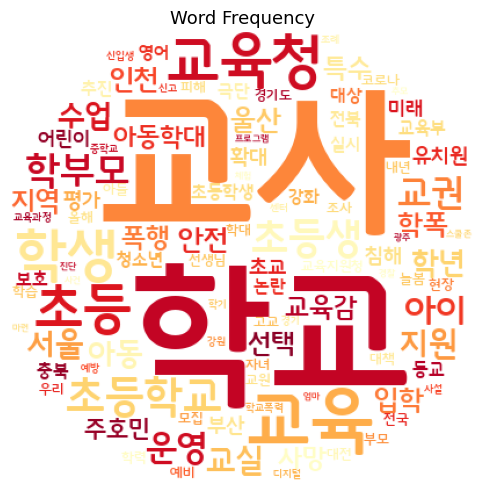

In [20]:
#@title 기본 제목 텍스트
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

im = Image.open('/content/drive/MyDrive/Colab Notebooks/FIELD_2023/circle.png') # 이미지 파일 읽어오기'
font = '/content/drive/MyDrive/Colab Notebooks/FIELD_2023/GodoM.ttf'

mask_arr = np.array(im) # 픽셀 값 배열 형태 변환

wordcloud = WordCloud(font_path=font, background_color ='white', colormap='YlOrRd',
                      width = 700, height = 700, random_state = 43, mask = mask_arr,
                      prefer_horizontal = True).generate_from_frequencies(dict(tags))

plt.figure(figsize = (6, 6))
plt.imshow(wordcloud)
plt.title("Word Frequency", size = 13)
plt.axis('off')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/FIELD_2023/wc.png', bbox_inches='tight')

plt.show()

In [71]:
x_cnt = counts['유흥'] + counts['침해']

In [72]:
y_cnt = counts['안전']

In [73]:
z_cnt = counts['교통']

In [74]:
x = x_cnt / (x_cnt + y_cnt + z_cnt)
y = y_cnt / (x_cnt + y_cnt + z_cnt)
z = z_cnt / (x_cnt + y_cnt + z_cnt)

In [75]:
print(f"x : {x}, y : {y}, z : {z}")

x : 0.4208955223880597, y : 0.4925373134328358, z : 0.08656716417910448
